UNIVERSIDADE FEDERAL DE ALFENAS
> TRABALHO DE INTELIGENCIA ARTIFICIAL


> Componentes:

*   Bárbara Rodrigues Silveira - 2021.1.08.042
*   Renan Magalhães Lage - 2021.1.08.020

In [ ]:
#Configurando o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importanto as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#--------------------------------------------------
# Processamento dos dados
#--------------------------------------------------
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#--------------------------------------------------

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/IA/breast-cancer-wisconsin.csv")

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,859471,B,9.029,17.33,58.79,250.5,1.066,1.413,313.000,4.375,...,10.310,22.65,65.50,324.7,1.482,4.365,1.252,175.000,4.228,1.175
1,859487,B,12.780,16.49,81.37,502.5,9.831,5.234,3.653,2.864,...,13.460,19.76,85.67,554.9,1.296,7.061,1.039,5.882,2.383,641.000
2,859575,M,18.940,21.31,123.60,1130.0,9.009,1.029,108.000,7.951,...,24.860,26.58,165.90,1866.0,1.193,2.336,2.687,1.789,2.551,6.589
3,859711,B,8.888,14.64,58.79,244.0,9.783,1.531,8.606,2.872,...,9.733,15.67,62.56,284.4,1.207,2.436,1.434,4.786,2.254,1.084
4,859717,M,17.200,24.52,114.20,929.4,1.071,183.000,1.692,7.944,...,23.320,33.82,151.60,1681.0,1.585,7.394,6.566,1.899,3.313,1.339


In [ ]:
# Exibindo  dimensao da base de dados
print("Dimensão dos dados:")
print("Linhas (Instâncias):{}".format(data.shape[0]))
print("Colunas (Atributos):{}".format(data.shape[1]))

Dimensão dos dados:
Linhas (Instâncias):569
Colunas (Atributos):32


In [ ]:
#Verificando dados nulos
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# Distribuicao das instancias
B, M = data['diagnosis'].value_counts()
print('Benignos : ',B)
print('Malignos : ',M)
print('---------------------')
print('Proporção de Benignos: ', 100*B/(B+M))
print('Proporção de Malignos: ', 100*M/(B+M))

Benignos :  357
Malignos :  212
---------------------
Proporção de Benignos:  62.74165202108963
Proporção de Malignos:  37.25834797891037


In [ ]:
# Separando os dados em entrada e saida desejada e removendo as colunas 'diagnosis' e 'id'
dadosEntrada = data.drop(['diagnosis','id'], axis=1)
saidaDesejada = data['diagnosis']

# Aplicando a função LabelEncoder na variavel saidaDesejada
saidaDesejada = LabelEncoder().fit_transform(saidaDesejada)

# Aplicando a funcao train_test_split para dividir o conjunto original em 70% para treindo e 30% para teste
dadosEntrada_train, dadosEntrada_test, saidaDesejada_train, saidaDesejada_test = train_test_split(dadosEntrada, saidaDesejada, test_size=0.3, random_state=1)

print('Tamanho Dados de Entrada Treinamento: ', len(dadosEntrada_train))
print('Tamanho Dados de Entrada Teste: ', len(dadosEntrada_test))
print('Tamanho Saída Desejada Treinamento: ', len(saidaDesejada_train))
print('Tamanho Saída Desejada Teste: ', len(saidaDesejada_test))

Tamanho Dados de Entrada Treinamento:  398
Tamanho Dados de Entrada Teste:  171
Tamanho Saída Desejada Treinamento:  398
Tamanho Saída Desejada Teste:  171


In [ ]:
saidaDesejada_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1])

Dividindo os dados de treino em quatro partes


In [ ]:
#Como precisamos de dividir o modelo de treinamento em 4 partes vamos fazer divisões por dois sucessivas para obter isso
treino_um, treino_dois, saida_um, saida_dois= train_test_split(dadosEntrada_train, saidaDesejada_train, test_size=0.5, random_state=1)
print('Tamanho treino 1: ',len(treino_um))
print('Tamanho treino 2: ',len(treino_dois))
print('Tamanho saida 1: ',len(saida_um))
print('Tamanho saida 2: ',len(saida_dois))

Tamanho treino 1:  199
Tamanho treino 2:  199
Tamanho saida 1:  199
Tamanho saida 2:  199


In [ ]:
#Agora iremos dividir os dois grupos obtidos na iteração passada por dois, obtendo quatro grupos diferentes
treino_um, treino_tres, saida_um, saida_tres= train_test_split(treino_um,saida_um, test_size=0.5, random_state=1)
treino_dois, treino_quatro, saida_dois, saida_quatro= train_test_split(treino_dois, saida_dois, test_size=0.5, random_state=1)
print('Tamanho treino 1: ',len(treino_um))
print('Tamanho treino 2: ',len(treino_tres))
print('Tamanho treino 3: ',len(treino_dois))
print('Tamanho treino 4: ',len(treino_quatro))
print('-----------------------')
print('Tamanho saida 1: ',len(saida_um))
print('Tamanho saida 2: ',len(saida_tres))
print('Tamanho saida 3: ',len(saida_dois))
print('Tamanho saida 4: ',len(saida_quatro))

Tamanho treino 1:  99
Tamanho treino 2:  100
Tamanho treino 3:  99
Tamanho treino 4:  100
-----------------------
Tamanho saida 1:  99
Tamanho saida 2:  100
Tamanho saida 3:  99
Tamanho saida 4:  100


# K-NEAREST NEIGBOURS - KNN



In [ ]:
# Carregando o modelo inteligente e as metricas de desempenho
#------------------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report,fbeta_score

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
# Definir parâmetros para busca em grade, esses parametros serao variados para atingir o objetivo pedido no trabalho (Devem ser geradas 15 variações de parâmetros para cada uma das 4 tecnicas de IA;)
parameters = {
    'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
    'metric': ['euclidean']
}
meus_scores = {'accuracy' :make_scorer(accuracy_score),
               'recall'   :make_scorer(recall_score),
               'precision':make_scorer(precision_score),
               'f1'       :make_scorer(f1_score)}

# Lista para armazenar os resultados dos modelos, vamos armazenar os melhores
resultados = []

# Armazenando cada conjunto em uma array para fazer o loop
subconjuntos_treinamento = [treino_um, treino_dois, treino_tres, treino_quatro]
subconjuntos_saida = [saida_um, saida_dois, saida_tres, saida_quatro]

# Loop pelos subconjuntos de treinamento
for i in range(len(subconjuntos_treinamento)):
    X_train = subconjuntos_treinamento[i]
    y_train = subconjuntos_saida[i]

    # Criar o classificador de árvore de decisão
    classificador = KNeighborsClassifier()

    # Realizar busca em grade para encontrar a melhor combinação de parametros
    buscaGrade = GridSearchCV(classificador, parameters, scoring = meus_scores, refit = 'recall', cv=5)
    buscaGrade.fit(X_train, y_train)

    # Obter os melhores parametros encontrados e a melhor pontuação
    melhorParam = buscaGrade.best_params_
    melhorPont = buscaGrade.best_score_

    # Armazenar os resultados
    resultados.append((melhorParam, melhorPont))

# Exibir os resultados
for i in range(len(resultados)):
    print(f"Resultados para subconjunto de treinamento {i+1}:")
    print("Melhores parâmetros:", resultados[i][0])
    print("Melhor pontuação:", resultados[i][1])
    print()

Resultados para subconjunto de treinamento 1:
Melhores parâmetros: {'metric': 'euclidean', 'n_neighbors': 9}
Melhor pontuação: 0.8805555555555555

Resultados para subconjunto de treinamento 2:
Melhores parâmetros: {'metric': 'euclidean', 'n_neighbors': 3}
Melhor pontuação: 0.8642857142857142

Resultados para subconjunto de treinamento 3:
Melhores parâmetros: {'metric': 'euclidean', 'n_neighbors': 3}
Melhor pontuação: 0.8285714285714286

Resultados para subconjunto de treinamento 4:
Melhores parâmetros: {'metric': 'euclidean', 'n_neighbors': 3}
Melhor pontuação: 0.8392857142857142



# Testando o KNN

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

-----Subsconjundo de dados 1-----
Acuracia para o Teste : 0.8830409356725146
Precision para o Teste : 0.9375
Recall para o Teste : 0.7258064516129032
F1 Score para o Teste : 0.8181818181818181


-----Matriz de Confusão 1-----


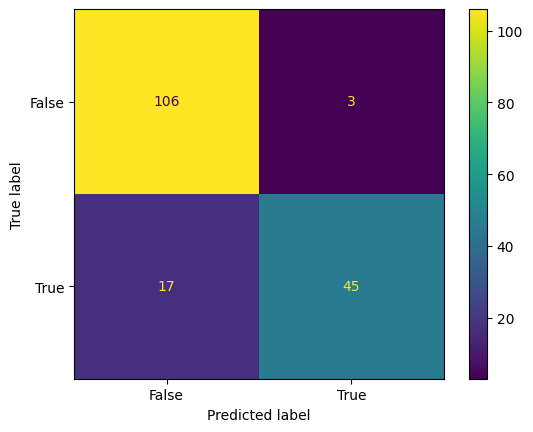

-----Subsconjundo de dados 2-----
Acuracia para o Teste : 0.9005847953216374
Precision para o Teste : 0.9591836734693877
Recall para o Teste : 0.7580645161290323
F1 Score para o Teste : 0.8468468468468467


-----Matriz de Confusão 2-----


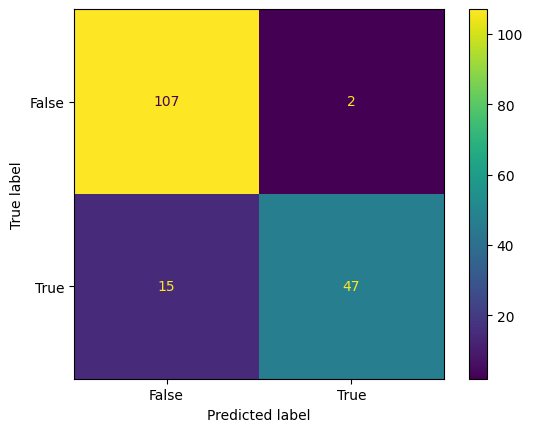

-----Subsconjundo de dados 3-----
Acuracia para o Teste : 0.8654970760233918
Precision para o Teste : 0.7910447761194029
Recall para o Teste : 0.8548387096774194
F1 Score para o Teste : 0.8217054263565892


-----Matriz de Confusão 3-----


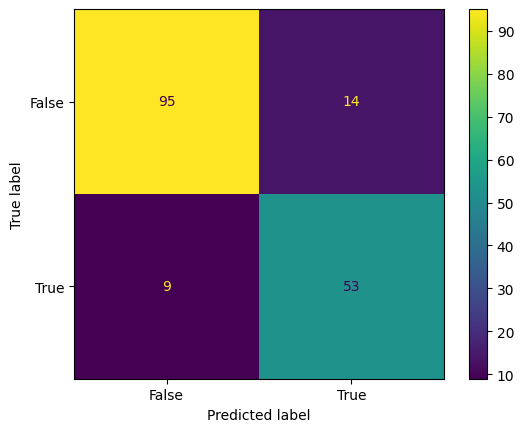

-----Subsconjundo de dados 4-----
Acuracia para o Teste : 0.9064327485380117
Precision para o Teste : 0.9791666666666666
Recall para o Teste : 0.7580645161290323
F1 Score para o Teste : 0.8545454545454544


-----Matriz de Confusão 4-----


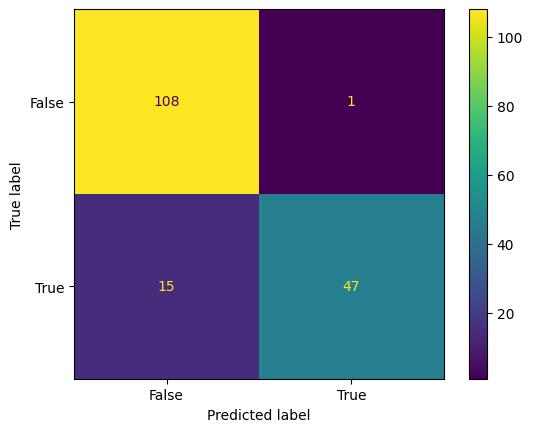

In [ ]:
# Loop pelos subconjuntos de teste
predicao_KNN= [[] for i in range(4)]
for i in range(4):

    # Criar o classificador de arvore de decisao com os melhores parametros encontrados
    classifier = KNeighborsClassifier(**resultados[i][0])

    # Treinar o classificador com o conjunto de treinamento correspondente
    classifier.fit(subconjuntos_treinamento[i], subconjuntos_saida[i])

    # Fazer previsoes no conjunto de teste
    y_pred = classifier.predict(dadosEntrada_test)
    predicao_KNN[i] = y_pred

    # Calcular todas as metricas
    accuracy = accuracy_score(saidaDesejada_test, y_pred)
    precision = precision_score(saidaDesejada_test, y_pred)
    recall = recall_score(saidaDesejada_test, y_pred)  # Calcula a recall
    f1 = f1_score(saidaDesejada_test, y_pred)  # Calcula o F1 score

    # Exibicao dos resultados
    print(f"-----Subsconjundo de dados {i+1}-----")
    print(f"Acuracia para o Teste : {accuracy}")
    print(f"Precision para o Teste : {precision}")
    print(f"Recall para o Teste : {recall}")
    print(f"F1 Score para o Teste : {f1}")
    print("\n")
    print(f"-----Matriz de Confusão {i+1}-----")

    confusion_matrix = metrics.confusion_matrix(saidaDesejada_test,  y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()


In [ ]:
for i in range(4):
  print(f"Lista de Resultados do Teste {i+1}")
  print()
  print(predicao_KNN[i])
  print()

Lista de Resultados do Teste 1

[1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0
 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1]

Lista de Resultados do Teste 2

[1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0
 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1]

Lista de Resultados do Teste 3

[1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1

# FLORESTA ALEATÓRIA

In [ ]:
# Carregando o modelo inteligente e as metricas de desempenho
#------------------------------------------------------------
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
# Definir parâmetros para busca em grade, esses parametros serao variados para atingir o objetivo pedido no trabalho (Devem ser geradas 15 variações de parâmetros para cada uma das 4 tecnicas de IA;)
parameters = {
    'n_estimators': [200],
    'max_depth': [5, 10, 15,20,25,30,35,40,45,50,55,60,65,70,75]
}
meus_scores = {'accuracy' :make_scorer(accuracy_score),
               'recall'   :make_scorer(recall_score),
               'precision':make_scorer(precision_score),
               'f1'       :make_scorer(f1_score)}
# Lista para armazenar os resultados dos modelos, vamos armazenar os melhores
resultados = []

# Armazenando cada conjunto em uma array para fazer o loop
subconjuntos_treinamento = [treino_um, treino_dois, treino_tres, treino_quatro]
subconjuntos_saida = [saida_um, saida_dois, saida_tres, saida_quatro]

# Loop pelos subconjuntos de treinamento
for i in range(len(subconjuntos_treinamento)):
    X_train = subconjuntos_treinamento[i]
    y_train = subconjuntos_saida[i]

    # Criar o classificador de árvore de decisão
    classificador = RandomForestClassifier(n_jobs=-1)

    # Realizar busca em grade para encontrar a melhor combinação de parametros
    buscaGrade = GridSearchCV(classificador, parameters, scoring=meus_scores, refit = 'recall', cv=5)
    buscaGrade.fit(X_train, y_train)

    # Obter os melhores parametros encontrados e a melhor pontuação
    melhorParam = buscaGrade.best_params_
    melhorPont = buscaGrade.best_score_

    # Armazenar os resultados
    resultados.append((melhorParam, melhorPont))

# Exibir os resultados
for i in range(len(resultados)):
    print(f"Resultados para subconjunto de treinamento {i+1}:")
    print("Melhores parâmetros:", resultados[i][0])
    print("Melhor pontuação:", resultados[i][1])
    print()

Resultados para subconjunto de treinamento 1:
Melhores parâmetros: {'max_depth': 5, 'n_estimators': 200}
Melhor pontuação: 0.9305555555555556

Resultados para subconjunto de treinamento 2:
Melhores parâmetros: {'max_depth': 5, 'n_estimators': 200}
Melhor pontuação: 0.8928571428571429

Resultados para subconjunto de treinamento 3:
Melhores parâmetros: {'max_depth': 10, 'n_estimators': 200}
Melhor pontuação: 0.8571428571428571

Resultados para subconjunto de treinamento 4:
Melhores parâmetros: {'max_depth': 10, 'n_estimators': 200}
Melhor pontuação: 0.8714285714285716



# Testando a Floresta Aleatória

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

-----Subsconjundo de dados 1-----
Acuracia para o Teste : 0.9181286549707602
Precision para o Teste : 0.9444444444444444
Recall para o Teste : 0.8225806451612904
F1 Score para o Teste : 0.8793103448275862


-----Matriz de Confusão 1-----


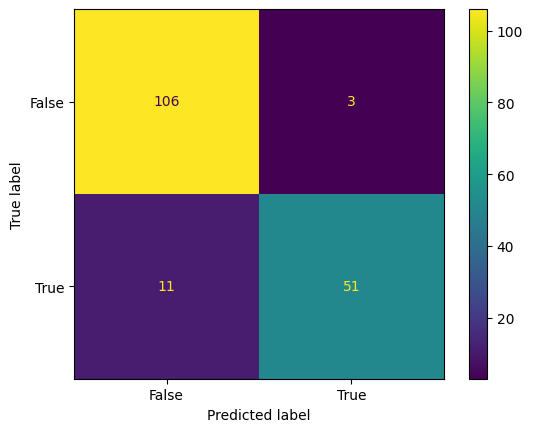

-----Subsconjundo de dados 2-----
Acuracia para o Teste : 0.9298245614035088
Precision para o Teste : 0.9464285714285714
Recall para o Teste : 0.8548387096774194
F1 Score para o Teste : 0.8983050847457628


-----Matriz de Confusão 2-----


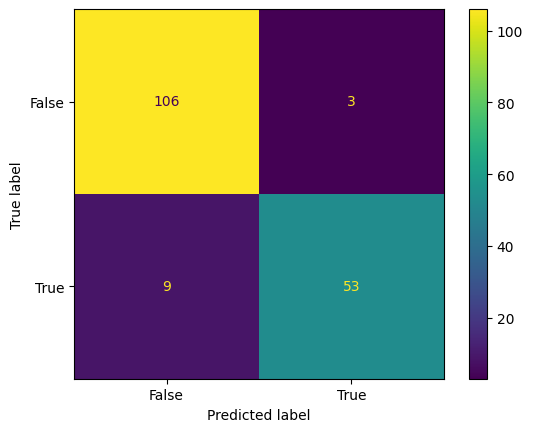

-----Subsconjundo de dados 3-----
Acuracia para o Teste : 0.9473684210526315
Precision para o Teste : 0.9344262295081968
Recall para o Teste : 0.9193548387096774
F1 Score para o Teste : 0.9268292682926829


-----Matriz de Confusão 3-----


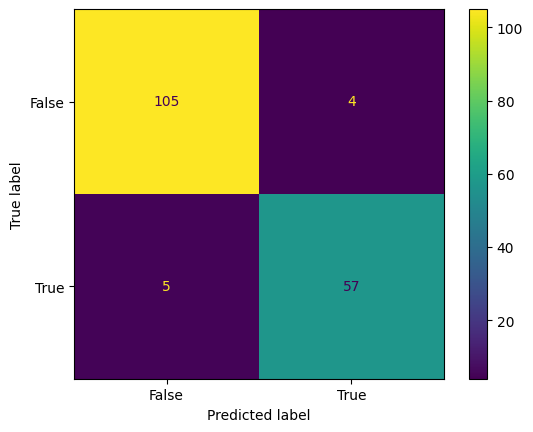

-----Subsconjundo de dados 4-----
Acuracia para o Teste : 0.9298245614035088
Precision para o Teste : 0.9629629629629629
Recall para o Teste : 0.8387096774193549
F1 Score para o Teste : 0.896551724137931


-----Matriz de Confusão 4-----


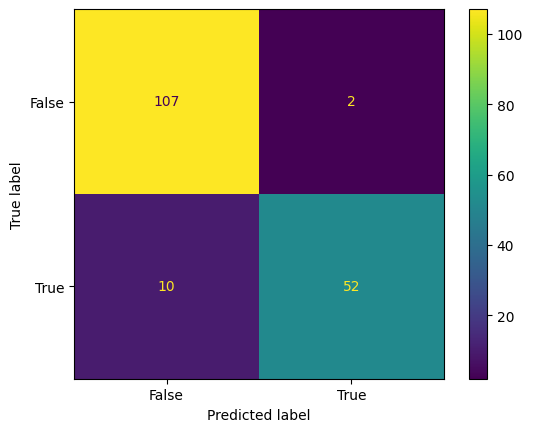

In [ ]:
# Loop pelos subconjuntos de teste
predicao_Floresta= [[] for i in range(4)]
for i in range(4):

    # Criar o classificador de arvore de decisao com os melhores parametros encontrados
    classifier = RandomForestClassifier(**resultados[i][0])

    # Treinar o classificador com o conjunto de treinamento correspondente
    classifier.fit(subconjuntos_treinamento[i], subconjuntos_saida[i])

    # Fazer previsoes no conjunto de teste
    y_pred = classifier.predict(dadosEntrada_test)
    predicao_Floresta[i] = y_pred

  # Calcular todas as metricas
    accuracy = accuracy_score(saidaDesejada_test, y_pred)
    precision = precision_score(saidaDesejada_test, y_pred)
    recall = recall_score(saidaDesejada_test, y_pred)  # Calcula a recall
    f1 = f1_score(saidaDesejada_test, y_pred)  # Calcula o F1 score

    # Exibicao dos resultados
    print(f"-----Subsconjundo de dados {i+1}-----")
    print(f"Acuracia para o Teste : {accuracy}")
    print(f"Precision para o Teste : {precision}")
    print(f"Recall para o Teste : {recall}")
    print(f"F1 Score para o Teste : {f1}")
    print("\n")
    print(f"-----Matriz de Confusão {i+1}-----")

    confusion_matrix = metrics.confusion_matrix(saidaDesejada_test,  y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()


In [ ]:
for i in range(4):
  print(f"Lista de Resultados do Teste {i+1}")
  print()
  print(predicao_Floresta[i])
  print()

Lista de Resultados do Teste 1

[1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0
 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1]

Lista de Resultados do Teste 2

[1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0
 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1]

Lista de Resultados do Teste 3

[1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1

# Árvore de Decisão

In [ ]:
# Importando bibliotecas
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir parâmetros para busca em grade, esses parametros serao variados para atingir o objetivo pedido no trabalho (Devem ser geradas 15 variações de parâmetros para cada uma das 4 tecnicas de IA;)
parameters = {
    'criterion': ['gini', 'entropy'], # Gini mede a impureza de um no com base na probabilidade de classificacao incorreta e entropy a impureza com base na informacao
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Lista para armazenar os resultados dos modelos, vamos armazenar os melhores
resultados = []

# Armazenando cada conjunto em uma array para fazer o loop
subconjuntos_treinamento = [treino_um, treino_dois, treino_tres, treino_quatro]
subconjuntos_saida = [saida_um, saida_dois, saida_tres, saida_quatro]

# Loop pelos subconjuntos de treinamento
for i in range(len(subconjuntos_treinamento)):
    X_train = subconjuntos_treinamento[i]
    y_train = subconjuntos_saida[i]

    # Criar o classificador de árvore de decisão
    classificador = DecisionTreeClassifier()

    # Realizar busca em grade para encontrar a melhor combinação de parametros
    buscaGrade = GridSearchCV(classificador, parameters, scoring='accuracy', cv=5)
    buscaGrade.fit(X_train, y_train)

    # Obter os melhores parametros encontrados e a melhor pontuação
    melhorParam = buscaGrade.best_params_
    melhorPont = buscaGrade.best_score_

    # Armazenar os resultados
    resultados.append((melhorParam, melhorPont))

# Exibir os resultados
for i in range(len(resultados)):
    print(f"Resultados para subconjunto de treinamento {i+1}:")
    print("Melhores parâmetros:", resultados[i][0])
    print("Melhor pontuação:", resultados[i][1])
    print()


Resultados para subconjunto de treinamento 1:
Melhores parâmetros: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Melhor pontuação: 0.9494736842105264

Resultados para subconjunto de treinamento 2:
Melhores parâmetros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Melhor pontuação: 0.9494736842105264

Resultados para subconjunto de treinamento 3:
Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Melhor pontuação: 0.9299999999999999

Resultados para subconjunto de treinamento 4:
Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5}
Melhor pontuação: 0.9299999999999999



# Testando a árvore de Decisão

In [ ]:
# Importando bibliotecas
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report

# Criando subconjuntos para os testes
subconjuntos_teste = [dadosEntrada_test, dadosEntrada_test, dadosEntrada_test, dadosEntrada_test]
subconjuntos_saida_teste = [saidaDesejada_test, saidaDesejada_test, saidaDesejada_test, saidaDesejada_test]

predicao_arvore= [[] for i in range(4)]
# Loop pelos subconjuntos de teste
for i in range(len(subconjuntos_teste)):
    X_test = subconjuntos_teste[i]
    y_test = subconjuntos_saida_teste[i]

    # Criar o classificador de arvore de decisao com os melhores parametros encontrados
    classifier = DecisionTreeClassifier(**resultados[i][0])

    # Treinar o classificador com o conjunto de treinamento correspondente
    classifier.fit(subconjuntos_treinamento[i], subconjuntos_saida[i])

    # Fazer previsoes no conjunto de teste
    y_pred = classifier.predict(X_test)
    predicao_arvore[i] = y_pred

    # Calcular todas as metricas
    accuracy = accuracy_score(saidaDesejada_test, y_pred)
    accuracy = accuracy_score(saidaDesejada_test, y_pred)
    recall = recall_score(saidaDesejada_test, y_pred)  # Calcula a recall
    f1 = f1_score(saidaDesejada_test, y_pred) # Calcula o F1 score

    # Exibicao dos resultados
    print(f"Previsao para o subconjunto de teste {i+1}: {y_pred}")
    print(f"Acuracia para subconjunto de teste {i+1}: {accuracy}")
    print(f"Recall para subconjunto de teste {i+1}: {recall}")
    print(f"F1 Score para subconjunto de teste {i+1}: {f1}")
    print("Matriz de Confusao:")
    print(classification_report(y_test, y_pred)) # plotando o relatório (de cima)
    print()


Previsao para o subconjunto de teste 1: [1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0
 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1]
Acuracia para subconjunto de teste 1: 0.8888888888888888
Recall para subconjunto de teste 1: 0.8225806451612904
F1 Score para subconjunto de teste 1: 0.8429752066115702
Matriz de Confusao:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       109
           1       0.86      0.82      0.84        62

    accuracy                           0.89       171
   macro avg       0.88      0.87      0.88       171
weighted avg       0.89      0.89      0.89       171


Previsao para o subconjunto de teste 2: [1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 

In [ ]:
for i in range(4):
  print(f"Lista de Resultados do Teste {i+1}")
  print()
  print(predicao_arvore[i])
  print()

Lista de Resultados do Teste 1

[1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0
 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1]

Lista de Resultados do Teste 2

[1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1
 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0
 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1]

Lista de Resultados do Teste 3

[1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1
 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1

# XGBOOST

In [ ]:
# Importando bibliotecas
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier


# Armazenando cada conjunto em uma array para fazer o loop
subconjuntos_treinamento = [treino_um, treino_dois, treino_tres, treino_quatro]
subconjuntos_saida = [saida_um, saida_dois, saida_tres, saida_quatro]

# Parametros pra a busca em grade
param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.05],
    'n_estimators': [100, 200]
}

# Array para armazenar os resultados
resultados = []

for i in range(len(subconjuntos_treinamento)):
    X_train = subconjuntos_treinamento[i]
    y_train = subconjuntos_saida[i]

    print(f"Subconjunto {i+1}")
    # Realiza a busca pelos melhores parametros
    # Cria o objeto do GridSearchCV para a busca em grade utilizando um classificador XGBoost
    buscaGrade = GridSearchCV(XGBClassifier(), param_grid, cv=3)
    buscaGrade.fit(X_train, y_train)

    # Obtem os melhores parametros encontrados
    melhorParam = buscaGrade.best_params_
    melhorPont = buscaGrade.best_score_

    # Treina o modelo com os melhores parametros encontrados
    model = XGBClassifier(**melhorParam)
    model.fit(X_train, y_train)

    # Armazena o resultado
    resultado = (melhorParam, melhorPont)
    resultados.append(resultado)

    # Exibindo resultados
    print("Resultado para subconjunto de treinamento:")
    print("Melhores parâmetros encontrados:", melhorParam)
    print("Melhores pontuação encontrados:", melhorPont)
    print()


Subconjunto 1
Resultado para subconjunto de treinamento:
Melhores parâmetros encontrados: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Melhores pontuação encontrados: 0.9090909090909092

Subconjunto 2
Resultado para subconjunto de treinamento:
Melhores parâmetros encontrados: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Melhores pontuação encontrados: 0.9393939393939394

Subconjunto 3
Resultado para subconjunto de treinamento:
Melhores parâmetros encontrados: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Melhores pontuação encontrados: 0.8695781342840166

Subconjunto 4
Resultado para subconjunto de treinamento:
Melhores parâmetros encontrados: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Melhores pontuação encontrados: 0.9102792632204397



# Testando XGBOOST

In [ ]:
# Importando bibliotecas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Criando subconjuntos para os testes
subconjuntos_teste = [dadosEntrada_test, dadosEntrada_test, dadosEntrada_test, dadosEntrada_test]
subconjuntos_saida_teste = [saidaDesejada_test, saidaDesejada_test, saidaDesejada_test, saidaDesejada_test]

# Loop pelos subconjuntos de teste
for i in range(len(subconjuntos_teste)):
    X_test = subconjuntos_teste[i]
    y_test = subconjuntos_saida_teste[i]

    # Criar o classificador de arvore de decisao com os melhores parametros encontrados
    classifier = XGBClassifier(**resultados[i][0])

    # Treinar o classificador com o conjunto de treinamento correspondente
    classifier.fit(subconjuntos_treinamento[i], subconjuntos_saida[i])

    # Fazer previsoes no conjunto de teste
    y_pred = classifier.predict(X_test)

    # Calcular todas as metricas
    accuracy = accuracy_score(saidaDesejada_test, y_pred)
    precision = precision_score(saidaDesejada_test, y_pred)
    recall = recall_score(saidaDesejada_test, y_pred)  # Calcula a recall
    f1 = f1_score(saidaDesejada_test, y_pred)  # Calcula o F1 score

    # Exibicao dos resultados
    print(f"Previsao para o subconjunto de teste {i+1}: {y_pred}")
    print(f"Acuracia para subconjunto de teste {i+1}: {accuracy}")
    print(f"Precisao para o subconjunto de teste {i+1}: {precision}")
    print(f"Recall para subconjunto de teste {i+1}: {recall}")
    print(f"F1 Score para subconjunto de teste {i+1}: {f1}")
    print("Matriz de Confusao:")
    print(classification_report(y_test, y_pred)) # plotando o relatório (de cima)
    print()


Previsao para o subconjunto de teste 1: [0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0
 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1]
Acuracia para subconjunto de teste 1: 0.9122807017543859
Precisao para o subconjunto de teste 1: 0.9607843137254902
Recall para subconjunto de teste 1: 0.7903225806451613
F1 Score para subconjunto de teste 1: 0.8672566371681416
Matriz de Confusao:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       109
           1       0.96      0.79      0.87        62

    accuracy                           0.91       171
   macro avg       0.93      0.89      0.90       171
weighted avg       0.92      0.91      0.91       171


Previsao para o subconjunto de teste